# Chapter 6. 일반선형모델

## 6.1 여러 가지 확률 분포

### 6.1.1 용어 설명

* **이항확률변수** : 2개의 값만 가지는 확률변수 (예를 들어 있다와 없다, 앞과 뒤 등)

* **베르누이 시행** : 2종류의 결과 중 하나만 발생시키는 시행(예를 들어 동전을 한 번 던져서 앞이 나올지 뒤가 나올지 기록하는 시행 등)

* **성공확률** : 2종류의 결과 중 어느 한쪽의 결과를얻을 확률을편의상 성공확률이라고 부름 [0, 1] 사이 범위

* **베르누이 분포** : 한 번의 베르누이 시행이 일어날때 이항확률변수가 따르는 확률분포

$$P \left( X = 1 \right) = p$$
$$P \left( X = 0 \right) = 1 - p$$

### 6.1.2 이항분포

* **이항분포** : 성공확률이 p면서 N회의 독립 베르누이 시행을 했을 때 성공한 횟수 m이 따르는 이산형 확률분포.

    - 이항분포의 모수(파라미터)는 성공확률 p와 시행횟수 N이다. 


* 이항분포를 따르는 확률변수 m의 기댓값은 $Np$로 계산하고 분산은 $Np(1-p)$로 계산함


### 6.1.3 이항분포 사용법

* 실제 분석을 할 때는 성공확률 p가 어떻게 변화하는가라는 시점으로 이항분포가 이용되는 경우가 많음

    * 시행횟수(또는 피험자 수) N과 성공횟수 m은 데이터로 주어지는 경우가 많음
    
* 예를 들어 흡연여부에 따라 암에 걸릴 확률이 어떻게 변화하는지, 가격을 변경하면 상품의 구입률이 변화하는지 등

### 6.1.4 이항분포의 확률질량함수

* 이항분포는 Binomial distribution의 약자를 취해서 **Bin**으로 표시함

$$Bin \left( m | N, p \right) = _{n}\textrm{C}_{m} \cdot p^m \cdot \left(1-p \right)^{N-m} $$

$$ _{n}\textrm{C}_{m} = \frac{N!}{\left(N-m\right)! \cdot m!}$$

* p:성공확률, N: 시행횟수, m은 성공횟수

### 6.1.5 분석 준비

In [1]:
# 이항분포를 다루기 위해 필요한 라이브러리 임포트

# 수치계산에 사용되는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 6.1.6 이항분포(실습)

* 이항분포 역시 정규분포와 마찬가지로 scipy.stats에 여러가지 함수가 준비되어 있음

* 우선 확률질량함수부터 보면 **```pmf```** 는 **Probability Mass Function**의 약자.

    - 파라미터는 성공횟수, 시행횟수, 성공확률을 순서대로 넘김

In [2]:
sp.stats.binom.pmf(k = 1, n = 2, p = 0.5)

0.500

* 난수 생성은 sp.stats.binom.rvs 함수를 사용

In [3]:
# 앞이 나올 확률이 20%인 동전을 10번 던져서 앞이 나온 수를 세는 시행을 5번 반복

np.random.seed(1)
sp.stats.binom.rvs(n = 10, p = 0.2, size = 5)

array([2, 3, 0, 1, 1])

* 난수의 히스토그램과 이항분포의 확률질량함수에서 계산된 확률을 겹쳐서 그래프 그리기

    - 정규분포과 달리 좌우 비대칭인 히스토그램이 생성

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


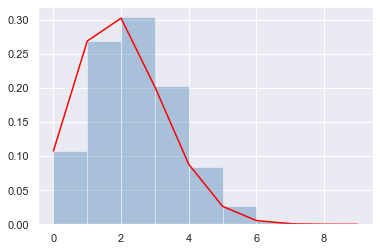

In [4]:
# N = 10, p = 0.2인 이항분포
binomial = sp.stats.binom(n = 10, p = 0.2)

# 난수 
np.random.seed(1)
rvs_binomial = binomial.rvs(size = 10000)

# 확률밀도함수 
m = np.arange(0, 10, 1)
pmf_binomial = binomial.pmf(k = m)

# 난수의 히스토그램과 확률질량함수를 겹쳐서 그리기
sns.distplot(rvs_binomial, bins = m, kde = False, norm_hist = True, color = 'steelblue')
plt.plot(m, pmf_binomial, color = "red")


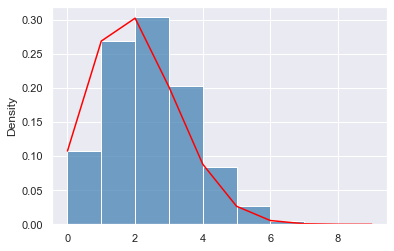

In [5]:
# 난수의 히스토그램과 확률질량함수를 겹쳐서 그리기
sns.histplot(rvs_binomial, bins = m, kde = False, color = 'steelblue', stat = "density")
plt.plot(m, pmf_binomial, color = "red")

### 6.1.7 포아송 분포

* 포아송 분포는 1개 또는 2개, 1회 또는 2회 등의 카운트 데이터가 따르는 이산형 확률분포

* 카운트 데이터는 0 이상의 정수라는 특징이 있음 ($-\infty \sim \infty$ 의 실수를 취하는 정규 분포와 큰 차이)

* 포아송 분포의 모수는 강도(일이 일어날횟수에 대한 기댓값, 발생 강도) $\lambda$ 밖에 없음

    - 포아송 분포를 따른 확률변수는 기댓값과 분산도  $\lambda$ 값과 같음

### 6.1.8 포아송 분포의 사용

* 예를 들어 낚싯대를바꾸면 잡아 올리는 물고기 수가 달라지는지, 주변 환경에 따라 조사 구획 내의 생물의 개체수가 변하는지, 날씨에 따라 상품의 판매 개수가 얼마나 달라지는지 등을 알아볼 때 사용

### 6.1.9 포아송 분포의 확률질량함수

* 포아송 분포의 확률질량함수 (x : 카운트 데이터 등 이산형 확률변수, $\lambda$ 는 포아송 분포의 강도) 

$$Pois \left( x | \lambda \right) = \frac{e^{-\lambda} \cdot \lambda^{x}}{x!}$$


### 6.1.10 이항 분포와 포아송 분포의 관계

* 포아송 분포는 이항분포에서 도출할 수 있음

    - 포아송 분포는 $ p \to  0, N \to \infty$ 라는 조건에서 이항분포가 $Np =\lambda$ 인 결과

    - 성공확률이 한없이 0에 가깝지만 시행횟수가 무한히 많은 이항분포
    
    - 일어나기 어려운 사건 $p \to  0$ 이지만, 대상이 되는 사람 수가 굉장히 많을 때 $N \to \infty$의 발생건수가 포아송 분포를 따름

### 6.1.11 포아송 분포(실습)

* 포아송 분포의 확률질량함수는 sp.stats.poisson.pmf를 사용해서 얻을 수 있음

* 강도가 5인 포아송 분포에서 어떤 값(k) 2를 얻는 확률은 다음과 같음

In [6]:
sp.stats.poisson.pmf(k = 2, mu = 5)

0.084

In [7]:
np.random.seed(1)
sp.stats.poisson.rvs(mu = 2, size = 5)

array([2, 1, 0, 1, 2])

* 난수의 히스토그램과 확률질량함수의 비교

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


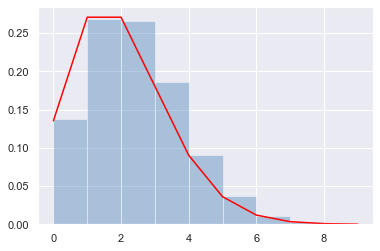

In [8]:
# lambda = 2인 포아송 분포
poisson = sp.stats.poisson(mu = 2)

# 난수 
np.random.seed(1)
rvs_poisson = poisson.rvs(size = 10000)

# 확률질량함수
pmf_poisson = poisson.pmf(k = m)

# 난수의 히스토그램과 확률질량함수를 겹쳐서 그리기
sns.distplot(rvs_poisson, bins = m, kde = False, norm_hist = True, color = 'steelblue')
plt.plot(m, pmf_poisson, color = "red")

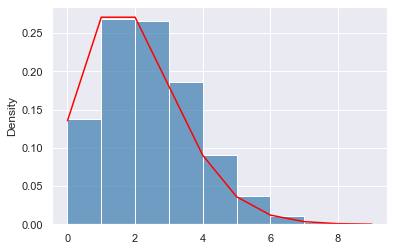

In [9]:
# 난수의 히스토그램과 확률질량함수를 겹쳐서 그리기
sns.histplot(rvs_poisson, bins = m, kde = False, stat = "density", color = 'steelblue')
plt.plot(m, pmf_poisson, color = "red")

* 시행횟수 100,000,000회, 성공확률 0.00000002로 한 이항분포의 확률질량함수를 강도 2인 포아송 분포의 확률질량함수와 비교

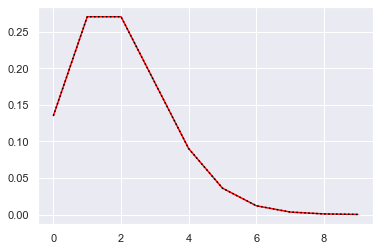

In [10]:
# N이 크고 p가 작은 이항분포
N = 100000000
p = 0.00000002
binomial_2 = sp.stats.binom(n = N, p = p)

# 확률질량함수 
pmf_binomial_2 = binomial_2.pmf(k = m)

# 확률질량 그래프
plt.plot(m, pmf_poisson, color = "red")
plt.plot(m, pmf_binomial_2, color = "black", linestyle = 'dotted')

* N이 크고 p가 작은 이항분포와 포아송 분포가 거의 일치하는 것을 확인 가능

### 6.1.12 그 외의 확률분포

* **음이항분포** : 포아송 분포와 마찬가지로 카운트 데이터가 따르는 확률분포. 포아송 분포보다 분산이 큰 것이 특징

    - 예를 들어 무리 짓는 생물의 개체수라면 포아송 분포로는 상정할 수 없는 큰 분산이 되는 경우가 있음
    
    - 이 문제를 **과분산** 이라고 부르며, 이때 음이항 분포를 사용하면 잘 모델링되는 경우가 있음


* **감마분포** : 0 이상의 값을 취하는 연속형 확률변수가 따르는 확률분포. 정규분포와 달리 0 이상의 값만 취하며, 분산값도 평균값에 따라 변함(비등분산)

### 6.1.13 지수형 분포

> https://blog.naver.com/jung1pp/221753670818

* 일반화선형모델은 정규분포 이외의 확률분포도 모집단분포로 가정할 수 있는 선형모델

* 정규분포 이외의 확률분포로 이용되는 것이 **지수족** (지수형 분포족)이라고 불리는 부류의 분포

    * 지수족은 정규분포 이외의 분포를 포함하지만, 정규분포가가지는 많은 편리한 성질을 가지고 있기 때문에 모델의 추정이나 해석이 용이
    
    * 지수족 정의($x$: 확률변수, $\theta$는 확률분포의 모수)
    
    $$f\left( x | \theta \right) = exp \left [ a(x)b(\theta) + c(\theta) + d(x) \right]$$
    
    * 특히 $a(x) = x$ 인 분포를 정준형(canonical)이라고 부르며, $b(\theta)$를 분포의 자연 파라미터라고 부름
    
    * 예를 들어 포아송 분포는 지수족에 포함되어 정준형으로 간주할 수 있음

        * $Pois \left( x | \lambda \right) = \frac{e^{-\lambda} \cdot \lambda^{x}}{x!} \quad \to \quad Pois \left( x | \lambda \right) = exp \left[ xlog\lambda - \lambda - logx! \right]$
        
        * $a(x) = x$이므로 정준형이며, 자연 파라미터는 $log\lambda$가 됨